# Bobcat fire

In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import jenkspy
import altair_latimes as lat
import altair as alt
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [44]:
df = gpd.read_file('input/Bobcat_Progression_20200929/bobcat_progression.geojson')

In [46]:
df.iloc[0]

In [52]:
len(df)

24

### Create a day column

In [73]:
df['day'] = pd.Series(range(1,25)).astype(int)

### Clean up the dates for display

In [77]:
df['prog_date'] = pd.to_datetime(df['prog_date'])

In [78]:
df['display_date'] = df['prog_date'].dt.strftime('%b. %-d ')

In [80]:
df.head(10)

,prog_date,Shape_Leng,Shape_Area,growth_ac,total_ac,legend_tex,geometry,day,display_date
0,2020-09-06,24543.640182,1.317591e+07,3256.0,3256,2020-09-06,"MULTIPOLYGON Z (((-117.96816 34.24212 0.00000,...",1,Sep. 6
1,2020-09-07,56037.373751,2.094689e+07,5176.0,8432,2020-09-07,"MULTIPOLYGON Z (((-117.91856 34.27793 0.00000,...",2,Sep. 7
2,2020-09-08,70555.456490,1.186344e+07,2932.0,11363,2020-09-08,"MULTIPOLYGON Z (((-117.91619 34.30979 0.00000,...",3,Sep. 8
3,2020-09-09,79150.048620,3.380963e+07,8355.0,19718,2020-09-09,"MULTIPOLYGON Z (((-117.91458 34.31145 0.00000,...",4,Sep. 9
4,2020-09-10,13.661759,3.662259e+00,0.0,19718,2020-09-10,"MULTIPOLYGON Z (((-117.98813 34.22278 0.00000,...",5,Sep. 10
5,2020-09-11,80644.256953,1.613980e+07,3988.0,23706,2020-09-11,"MULTIPOLYGON Z (((-117.85895 34.32614 0.00000,...",6,Sep. 11
6,2020-09-12,82119.143891,1.005495e+07,2485.0,26191,2020-09-12,"MULTIPOLYGON Z (((-117.98225 34.19875 0.00000,...",7,Sep. 12
7,2020-09-13,5877.859473,7.562361e+02,0.0,26191,2020-09-13,"MULTIPOLYGON Z (((-117.88354 34.35090 0.00000,...",8,Sep. 13
8,2020-09-14,141436.046525,4.809427e+07,11884.0,38075,2020-09-14,"MULTIPOLYGON Z (((-117.92898 34.21071 0.00000,...",9,Sep. 14
9,2020-09-15,96566.506413,1.194442e+07,2952.0,41027,2020-09-15,"MULTIPOLYGON Z (((-117.97099 34.17966 0.00000,...",10,Sep. 15


<AxesSubplot:>

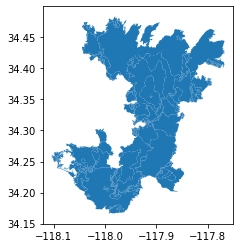

In [81]:
df.plot()

In [82]:
df = df.set_crs("EPSG:4326", allow_override=True)

### Output to Mapbox

In [83]:
df.to_file('output/bobcat_progression.geojson', driver='GeoJSON')

In [85]:
!tippecanoe --force -z15 -Z6 -o output/bobcat_progression.mbtiles --drop-densest-as-needed output/bobcat_progression.geojson

For layer 0, using name "bobcat_progression"
output/bobcat_progression.geojson:0: ignoring dimensions beyond two
In JSON object [-117.968163600734314,34.242118477026743,0.0]
In JSON object {"type":"Feature","properties":{"prog_date":"2020/09/06 00:00:00","Shape_Leng":24543.640182300001,"Shape_Area":13175913.533600001,"growth_ac":3256.0,"total_ac":3256,"legend_tex":"2020-09-06","day":1,"display_date":"Sep. 6 "},"geometry":{"type":"MultiPolygon","coordinates":[[[[-117.968163600734314,34.242118477026743,0.0],[-117.96820308545378,34.242286086511491,0.0],[-117.96820313566576,34.242286298941814,0.0],[-117.968203032069141,34.2422863556721,0.0],[-117.96831095810596,34.242744413009035,0...
24 features, 357749 bytes of geometry, 704 bytes of separate metadata, 2203 bytes of string pool
  99.9%  15/5644/13046  
